In [139]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/decaydata.csv')
data.dropna(inplace=True)
data['30 min decay'] = data["T0"]-data["T0.5"]
data["SUVA"] = data["UVA"]/data["FOC"]*100

In [209]:
cleaneddata = data[(data["Code"] != "SW23")]

In [210]:
SW = cleaneddata[cleaneddata["Code"].str.contains('SW')==True]
GW = cleaneddata[cleaneddata["Code"].str.contains('GW')==True]


In [211]:
SW

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,30 min decay,SUVA
40,SW1,10/12/2019,0.89,0.49,0.93,1,4,15,39,58,7.57,59.0,0.3,140.0,0.32,1.0,1.6,0.020,0.40,1.25
41,SW1,10/12/2019,2.10,1.34,2.00,4,12,42,64,120,7.57,59.0,0.3,140.0,0.32,1.0,1.6,0.020,0.76,1.25
42,SW1,10/12/2019,4.00,3.30,4.10,7,33,61,40,140,7.57,59.0,0.3,140.0,0.32,1.0,1.6,0.020,0.70,1.25
43,SW1,10/12/2019,5.90,5.60,6.10,13,49,64,31,160,7.57,59.0,0.3,140.0,0.32,1.0,1.6,0.020,0.30,1.25
44,SW1,10/12/2019,11.60,9.80,11.20,22,61,62,25,170,7.57,59.0,0.3,140.0,0.32,1.0,1.6,0.020,1.80,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,SW57,28/01/2014,0.90,0.60,0.90,1,3,13,46,62,7.33,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.30,0.75
605,SW57,28/01/2014,2.00,1.50,2.00,3,11,42,65,121,7.33,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.50,0.75
606,SW57,28/01/2014,3.90,3.80,3.90,11,35,67,45,158,7.33,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.10,0.75
607,SW57,28/01/2014,5.90,5.90,5.90,13,44,67,50,174,7.33,40.0,0.6,80.0,0.26,2.0,2.4,0.018,0.00,0.75


In [212]:
SW.describe()

,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,30 min decay,SUVA
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,4.598966,3.882457,4.623190,30.219828,37.241379,45.099138,28.008621,140.504310,7.550043,44.224138,0.839009,94.073276,0.217198,3.219828,3.191810,0.038323,0.716509,1.150252
std,3.321217,3.161091,3.345441,37.464661,31.422583,29.907268,20.104487,89.075725,0.596956,23.929039,0.927965,53.803223,0.151824,5.637609,2.023471,0.039776,1.168951,0.459464
min,0.720000,0.040000,0.810000,1.000000,1.000000,1.000000,1.000000,3.000000,6.640000,7.000000,0.100000,14.000000,0.020000,1.000000,0.500000,0.006000,-1.500000,0.600000
25%,1.795000,1.107500,1.800000,5.000000,11.750000,24.750000,14.750000,78.500000,7.170000,27.000000,0.300000,65.000000,0.070000,1.000000,1.500000,0.016000,0.100000,0.838235
50%,4.000000,3.350000,4.000000,15.000000,32.500000,39.000000,26.000000,130.000000,7.430000,34.000000,0.500000,75.000000,0.240000,1.000000,2.400000,0.027000,0.500000,1.071429
75%,6.225000,5.800000,6.400000,38.500000,52.250000,62.250000,37.000000,175.500000,7.810000,59.000000,0.900000,110.000000,0.300000,3.000000,4.600000,0.049000,1.065000,1.218750
max,12.000000,12.400000,11.800000,190.000000,180.000000,130.000000,110.000000,500.000000,9.430000,122.000000,4.900000,280.000000,0.600000,39.000000,10.000000,0.260000,8.700000,2.600000


In [213]:
GW.describe()

,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,30 min decay,SUVA
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,4.610529,2.787235,4.643118,11.635294,14.670588,20.082353,28.082353,73.952941,7.130588,120.911765,6.429412,280.323529,0.778824,13.647059,1.682353,0.064588,1.823294,3.122950
std,3.291894,2.776574,3.296362,26.665514,21.783164,23.203862,41.203697,75.581283,0.697073,73.290929,10.316257,211.790859,0.588287,28.083648,1.005156,0.069943,1.719025,2.223086
min,0.870000,0.000000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,5.890000,34.000000,0.100000,34.000000,0.040000,1.000000,0.500000,0.001000,-1.000000,0.200000
25%,1.835000,0.665000,1.820000,1.000000,1.000000,2.000000,2.000000,12.500000,6.640000,60.000000,0.200000,115.000000,0.240000,1.000000,1.300000,0.030000,0.480000,2.294118
50%,4.100000,1.665000,4.000000,2.500000,4.000000,9.500000,12.500000,42.500000,6.970000,84.000000,0.750000,155.000000,0.460000,3.000000,1.500000,0.040000,1.250000,2.602564
75%,6.100000,4.600000,6.100000,7.000000,16.500000,33.000000,32.500000,127.500000,7.910000,198.000000,9.600000,470.000000,1.400000,7.000000,1.800000,0.053000,3.200000,3.615385
max,12.000000,11.200000,11.800000,220.000000,120.000000,98.000000,230.000000,330.000000,8.110000,242.000000,38.000000,680.000000,1.800000,120.000000,4.400000,0.240000,6.200000,11.875000


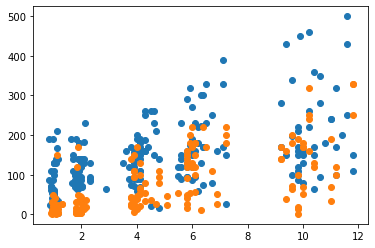

In [214]:
plt.scatter(SW["Dose Rate (mg/L)"],SW["TTHM"])
plt.scatter(GW["Dose Rate (mg/L)"],GW["TTHM"])
plt.show()


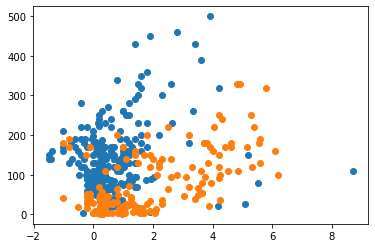

In [215]:
plt.scatter(SW["30 min decay"],SW["TTHM"])
plt.scatter(GW["30 min decay"],GW["TTHM"])
plt.show()

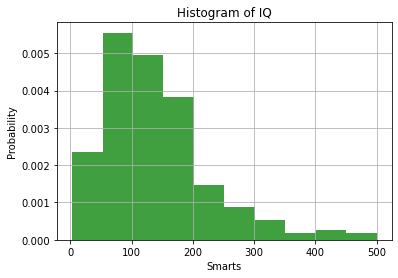

In [216]:
n, bins, patches = plt.hist(SW["TTHM"], 10, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

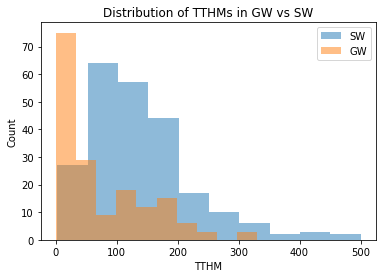

In [217]:


plt.hist(SW["TTHM"], 10, alpha=0.5, label='SW')
plt.hist(GW["TTHM"], 10, alpha=0.5, label='GW')
plt.legend(loc='upper right')
plt.xlabel('TTHM')
plt.ylabel('Count')
plt.title('Distribution of TTHMs in GW vs SW')
plt.show()

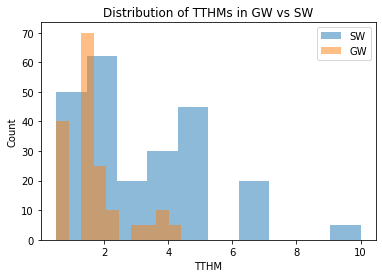

In [218]:

plt.hist(SW["FOC"], 10, alpha=0.5, label='SW')
plt.hist(GW["FOC"], 10, alpha=0.5, label='GW')
plt.legend(loc='upper right')
plt.xlabel('TTHM')
plt.ylabel('Count')
plt.title('Distribution of TTHMs in GW vs SW')
plt.show()

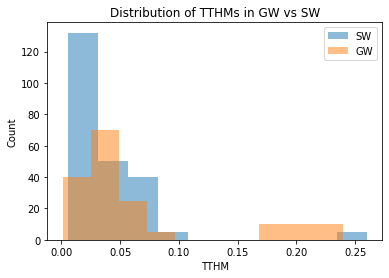

In [219]:
plt.hist(SW["UVA"], 10, alpha=0.5, label='SW')
plt.hist(GW["UVA"], 10, alpha=0.5, label='GW')
plt.legend(loc='upper right')
plt.xlabel('TTHM')
plt.ylabel('Count')
plt.title('Distribution of TTHMs in GW vs SW')
plt.show()

In [220]:
outlier = data[(data['UVA'] > 0.15)]

In [221]:
outlier

,Code,Date,T0,T0.5,Dose Rate (mg/L),CHCl3,CHCl2Br,CHClBr2,CHBr3,TTHM,pH,COND,Turb,Cl,Br,COLOUR,FOC,UVA,30 min decay,SUVA
155,GW17,4/07/2019,1.11,0.03,1.14,4,7,9,4,24,6.54,58.0,8.7,135.0,0.34,55.0,3.4,0.21,1.08,6.176471
156,GW17,4/07/2019,1.89,0.55,2.02,4,7,8,6,25,6.54,58.0,8.7,135.0,0.34,55.0,3.4,0.21,1.34,6.176471
157,GW17,4/07/2019,5.00,1.38,4.80,15,34,47,17,110,6.54,58.0,8.7,135.0,0.34,55.0,3.4,0.21,3.62,6.176471
158,GW17,4/07/2019,6.10,3.60,7.20,50,80,73,14,220,6.54,58.0,8.7,135.0,0.34,55.0,3.4,0.21,2.50,6.176471
159,GW17,4/07/2019,12.00,6.70,11.80,73,93,68,15,250,6.54,58.0,8.7,135.0,0.34,55.0,3.4,0.21,5.30,6.176471
160,GW18,4/07/2019,1.11,0.11,1.14,3,1,1,1,4,6.60,56.0,2.4,115.0,0.34,31.0,3.8,0.23,1.00,6.052632
161,GW18,4/07/2019,1.89,0.86,2.02,6,6,4,1,16,6.60,56.0,2.4,115.0,0.34,31.0,3.8,0.23,1.03,6.052632
162,GW18,4/07/2019,5.00,1.24,4.80,21,32,33,8,94,6.60,56.0,2.4,115.0,0.34,31.0,3.8,0.23,3.76,6.052632
163,GW18,4/07/2019,6.10,0.55,7.20,48,66,53,8,180,6.60,56.0,2.4,115.0,0.34,31.0,3.8,0.23,5.55,6.052632
164,GW18,4/07/2019,12.00,7.10,11.80,130,120,70,6,330,6.60,56.0,2.4,115.0,0.34,31.0,3.8,0.23,4.90,6.052632


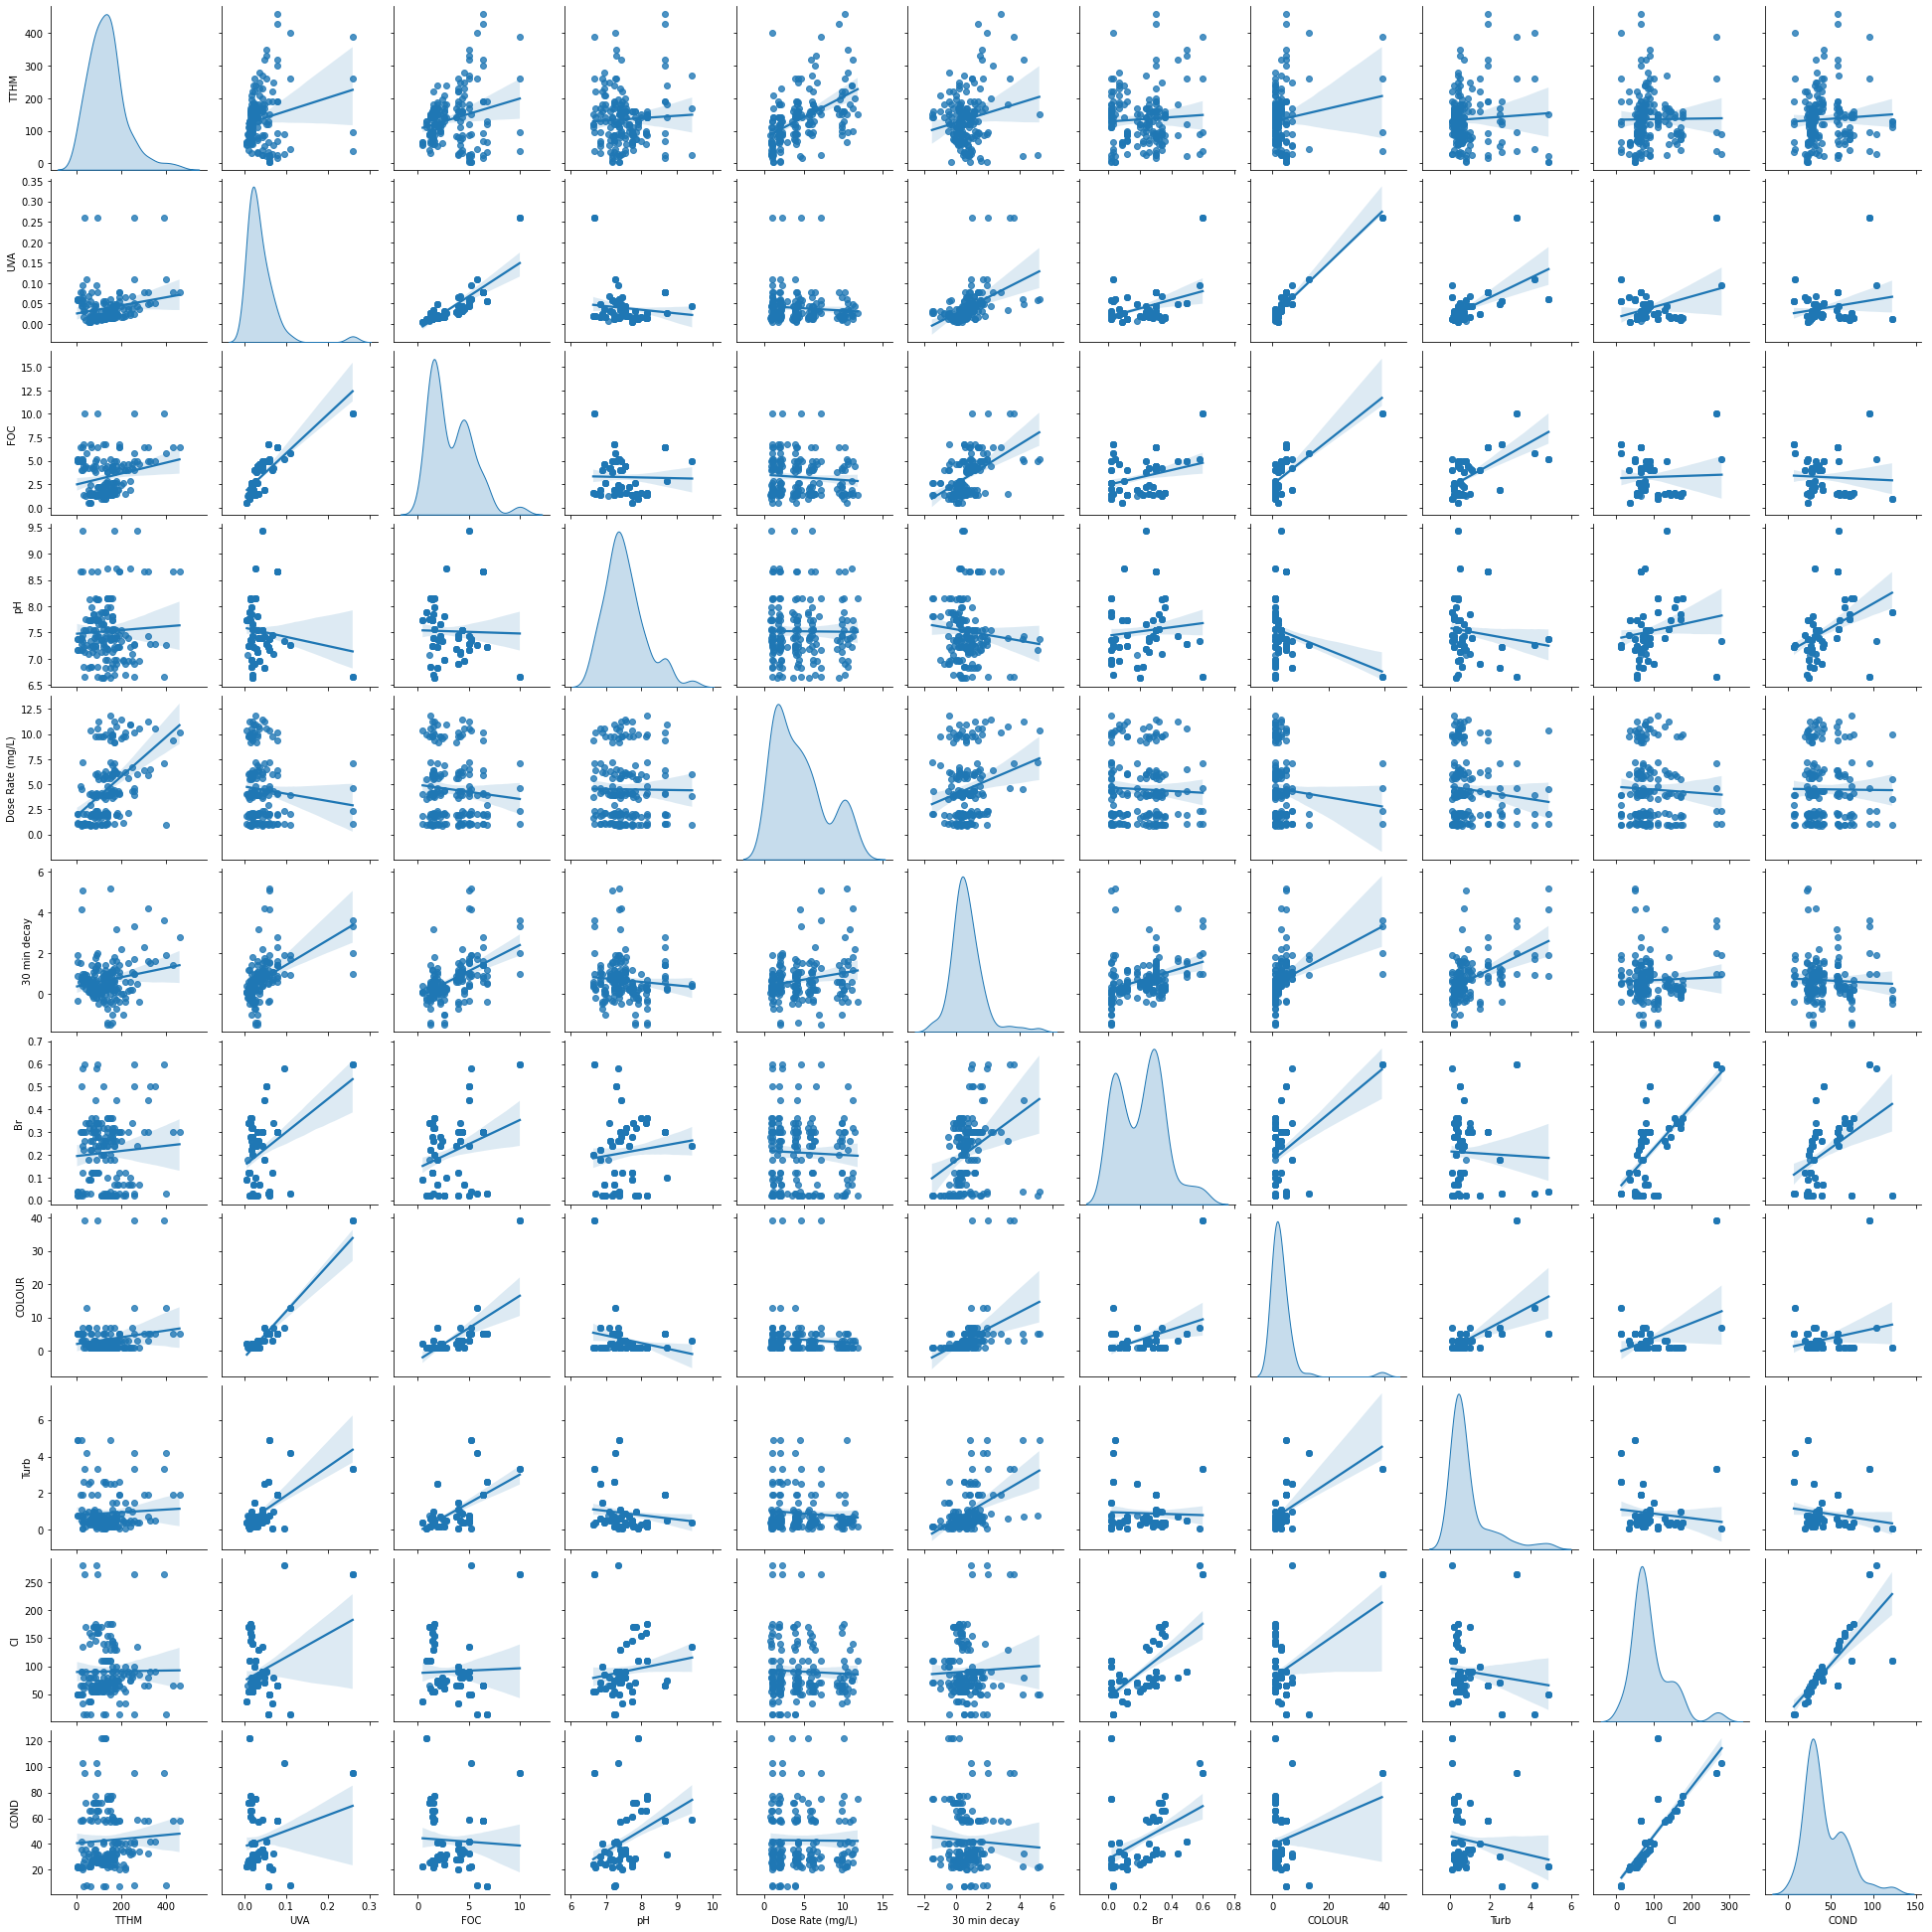

In [168]:
train_dataset = X_train.copy()
train_dataset.insert(0, "TTHM", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

### Basic Multi Linear Regression Model

#### Total

In [254]:
X = SW[["UVA","FOC","pH","Dose Rate (mg/L)","30 min decay","Br","COLOUR","Turb","Cl","COND"]]
y = SW["TTHM"].values.reshape(-1, 1)

In [239]:
from sklearn.model_selection import train_test_split

# initial X, Y split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [240]:
# Standard scale
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [241]:
from sklearn.linear_model import LinearRegression


MLRegression = LinearRegression()

In [242]:
MLRegression.fit(X_train_scaled, y_train)
training_score = MLRegression.score(X_train_scaled, y_train)
testing_score = MLRegression.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4518647342541575
Testing Score: 0.44209136799680726


In [243]:
y_pred = MLRegression.predict(X_test_scaled)

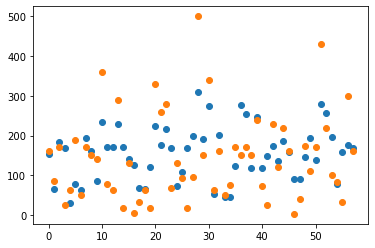

In [244]:
plt.scatter(np.arange(len(y_pred)),y_pred.ravel())
plt.scatter(np.arange(len(y_pred)),y_test.ravel())
plt.show()

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=42)
# rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)])
randomForestRegressor.fit(X_train_scaled,y_train.ravel())
y_pred_rfr=randomForestRegressor.predict(X_test_scaled)

In [247]:
from sklearn.metrics import r2_score
r2_score(y_test.ravel(),y_pred_rfr)

0.8728594654018722

In [248]:
randomForestRegressor.score(X_test_scaled, y_test)

0.8728594654018722

In [249]:
y_pred_rfr

array([182.35, 109.87, 143.03,  60.06,  59.28, 142.69,  64.56, 136.53,
       116.95, 132.25, 259.92, 109.31, 119.61, 294.79,  43.72, 124.04,
        67.71,  67.33,  66.47,  29.52, 322.8 , 224.83, 213.59, 100.9 ,
       132.4 , 101.1 ,  91.37, 134.4 , 394.6 , 153.44, 294.56,  68.79,
       171.09,  69.87,  89.81, 156.26, 164.99, 194.69, 138.28, 234.54,
       107.53,  53.64, 198.06, 145.1 , 217.21, 204.79,  29.84,  41.11,
       181.05, 107.92, 157.94, 354.8 , 172.82, 130.78, 106.22, 118.3 ,
       225.23, 155.32])

In [250]:
y_test.ravel()

array([160,  86, 170,  25,  62, 190,  51, 170, 150, 140, 360,  79,  64,
       290,  17, 130,   6,  34,  62,  18, 330, 260, 280,  69, 130,  94,
        17,  95, 500, 150, 340,  63, 160,  50,  76, 170, 150, 170, 150,
       240,  74,  26, 230, 120, 220, 160,   3,  40, 174, 110, 170, 430,
       220, 100,  82,  33, 300, 160], dtype=int64)

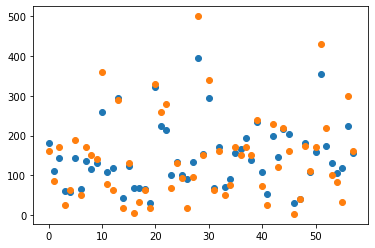

In [251]:
plt.scatter(np.arange(len(y_pred_rfr)),y_pred_rfr.ravel())
plt.scatter(np.arange(len(y_pred_rfr)),y_test.ravel())
plt.show()

In [252]:
feature_list = list(X.columns)

In [253]:
# Get numerical feature importances
importances = list(randomForestRegressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Dose Rate (mg/L)     Importance: 0.38
Variable: FOC                  Importance: 0.18
Variable: UVA                  Importance: 0.1
Variable: Br                   Importance: 0.09
Variable: 30 min decay         Importance: 0.06
Variable: pH                   Importance: 0.05
Variable: Cl                   Importance: 0.05
Variable: COND                 Importance: 0.04
Variable: Turb                 Importance: 0.03
Variable: SUVA                 Importance: 0.02
Variable: COLOUR               Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

In [255]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [257]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled,y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [258]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [261]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(train_features, train_labels)
base_accuracy = evaluate(randomForestRegressor, X_test_scaled, y_test.ravel())
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test.ravel())
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 28.9148 degrees.
Accuracy = 30.10%.
Model Performance
Average Error: 30.4879 degrees.
Accuracy = 24.88%.
Improvement of -17.34%.


In [262]:
best_random.score(X_test_scaled, y_test)

0.8536931962256893

In [273]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [80, 90, 100,120], 'min_samples_split': [1, 2, 3]}
dtree_model = RandomForestRegressor()          
clf = GridSearchCV(dtree_model, tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1)

In [274]:
clf.fit(X_train_scaled, y_train.ravel())
clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\fernb\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.75429907 0.75429769 0.76076586
 0.75454031 0.75788408 0.75507687        nan        nan        nan
 0.76072155 0.75727264 0.7571602  0.75225388 0.75149333 0.75470678
        nan        nan        nan 0.75962152 0.75804053 0.75811821
 0.75586704 0.75168959 0.75222623        nan        nan        nan
 0.75895345 0.75822388 0.75415528 0.75160782 0.76096451 0.75434991]
  warnings.warn(


{'max_depth': 120, 'min_samples_split': 3, 'n_estimators': 700}

In [275]:
clf.score(X_test_scaled, y_test)

0.855785474333425

In [276]:
y_pred_clf = clf.predict(X_test_scaled)

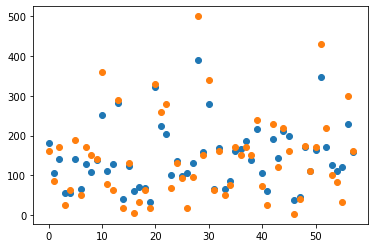

In [277]:
plt.scatter(np.arange(len(y_pred_clf)),y_pred_clf.ravel())
plt.scatter(np.arange(len(y_pred_clf)),y_test.ravel())
plt.show()